# Introcution

This file is used to create the B-Dataset. Originally this was done in a different file, but was migrated here due to clarity issues. Here, mostly productive functions are going to be applied, meaning that the necessary analysis can be found in files within the analysis folder. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from main.utils.data_manage_utils import load_processed_data_by_folder, save_processed_data_to_folder
from main.utils.time_utils import print_time

# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/class")
OUTPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")

In [2]:
X_train, y_train, X_test, y_test = load_processed_data_by_folder(INPUT_FOLDER)

print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("X_train table: ")
X_train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)
X_train table: 


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


## Dropping Columns
Some columns were not introduced when the B-file was created. These and originally intended deleted columns are now deleted

In [3]:
X_train.drop(["MEDIAN_CARR_DELAY(MINS)", "MEDIAN_ORIGIN_DELAY(MINS)", "PARKING_AREA(SQM)", "ALTIMETER(PA)"], axis="columns")
X_test.drop(["MEDIAN_CARR_DELAY(MINS)", "MEDIAN_ORIGIN_DELAY(MINS)", "PARKING_AREA(SQM)", "ALTIMETER(PA)"], axis="columns")
X_train

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [4]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))
X_train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

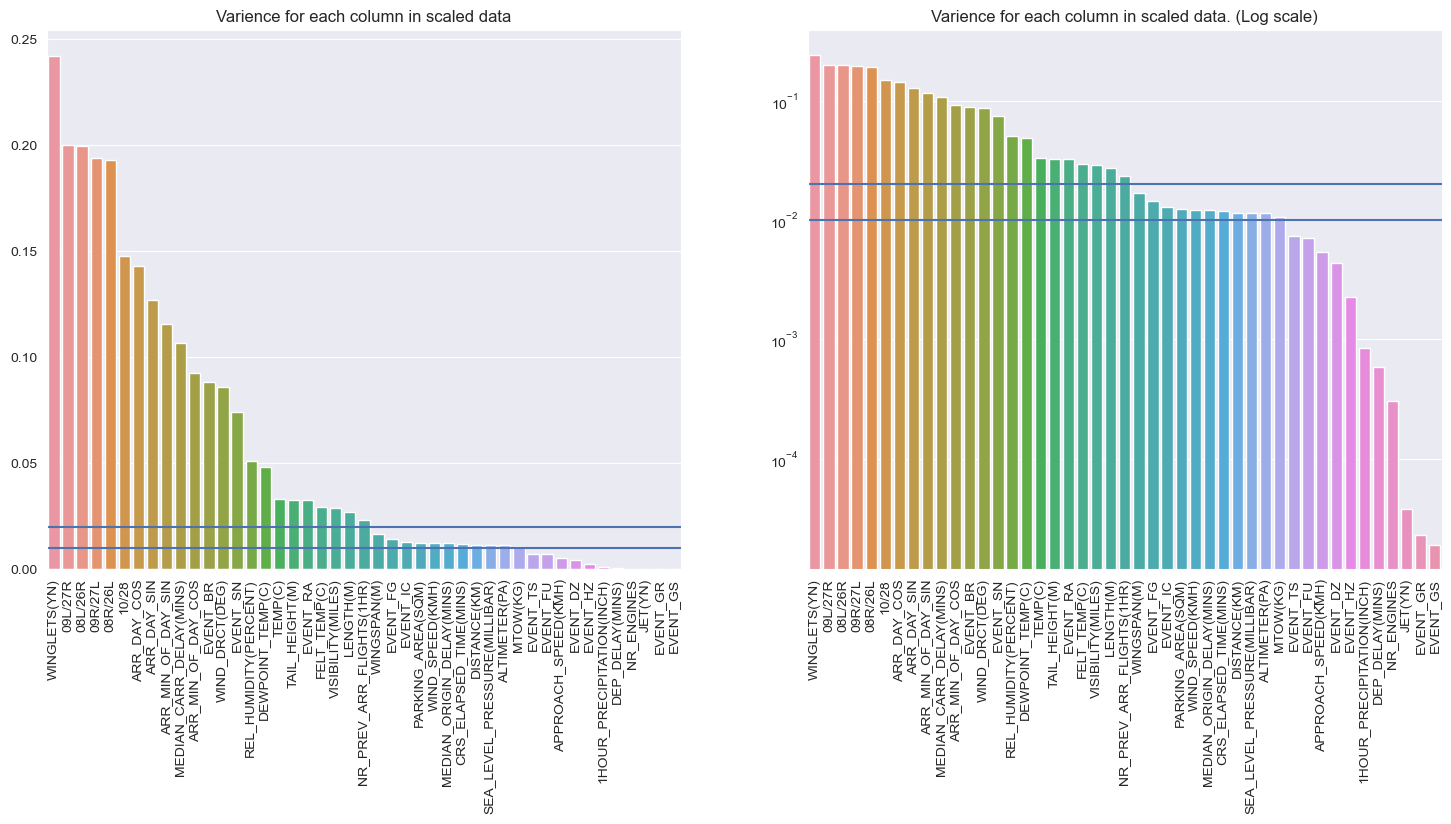

In [6]:
fig, axes = plt.subplots(1,2,figsize=(18,7))
var = pd.DataFrame(X_train_scaled, columns=X_train.columns).var().sort_values(ascending=False)
sns.set(style="whitegrid")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[0].set_title("Varience for each column in scaled data")
sns.barplot(x=list(var.index), y = list(var.values), ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, horizontalalignment='center')
axes[1].set_yscale("log")
axes[1].set_title("Varience for each column in scaled data. (Log scale)")
axes[0].axhline(0.01)
axes[1].axhline(0.01)
axes[0].axhline(0.02)
axes[1].axhline(0.02)

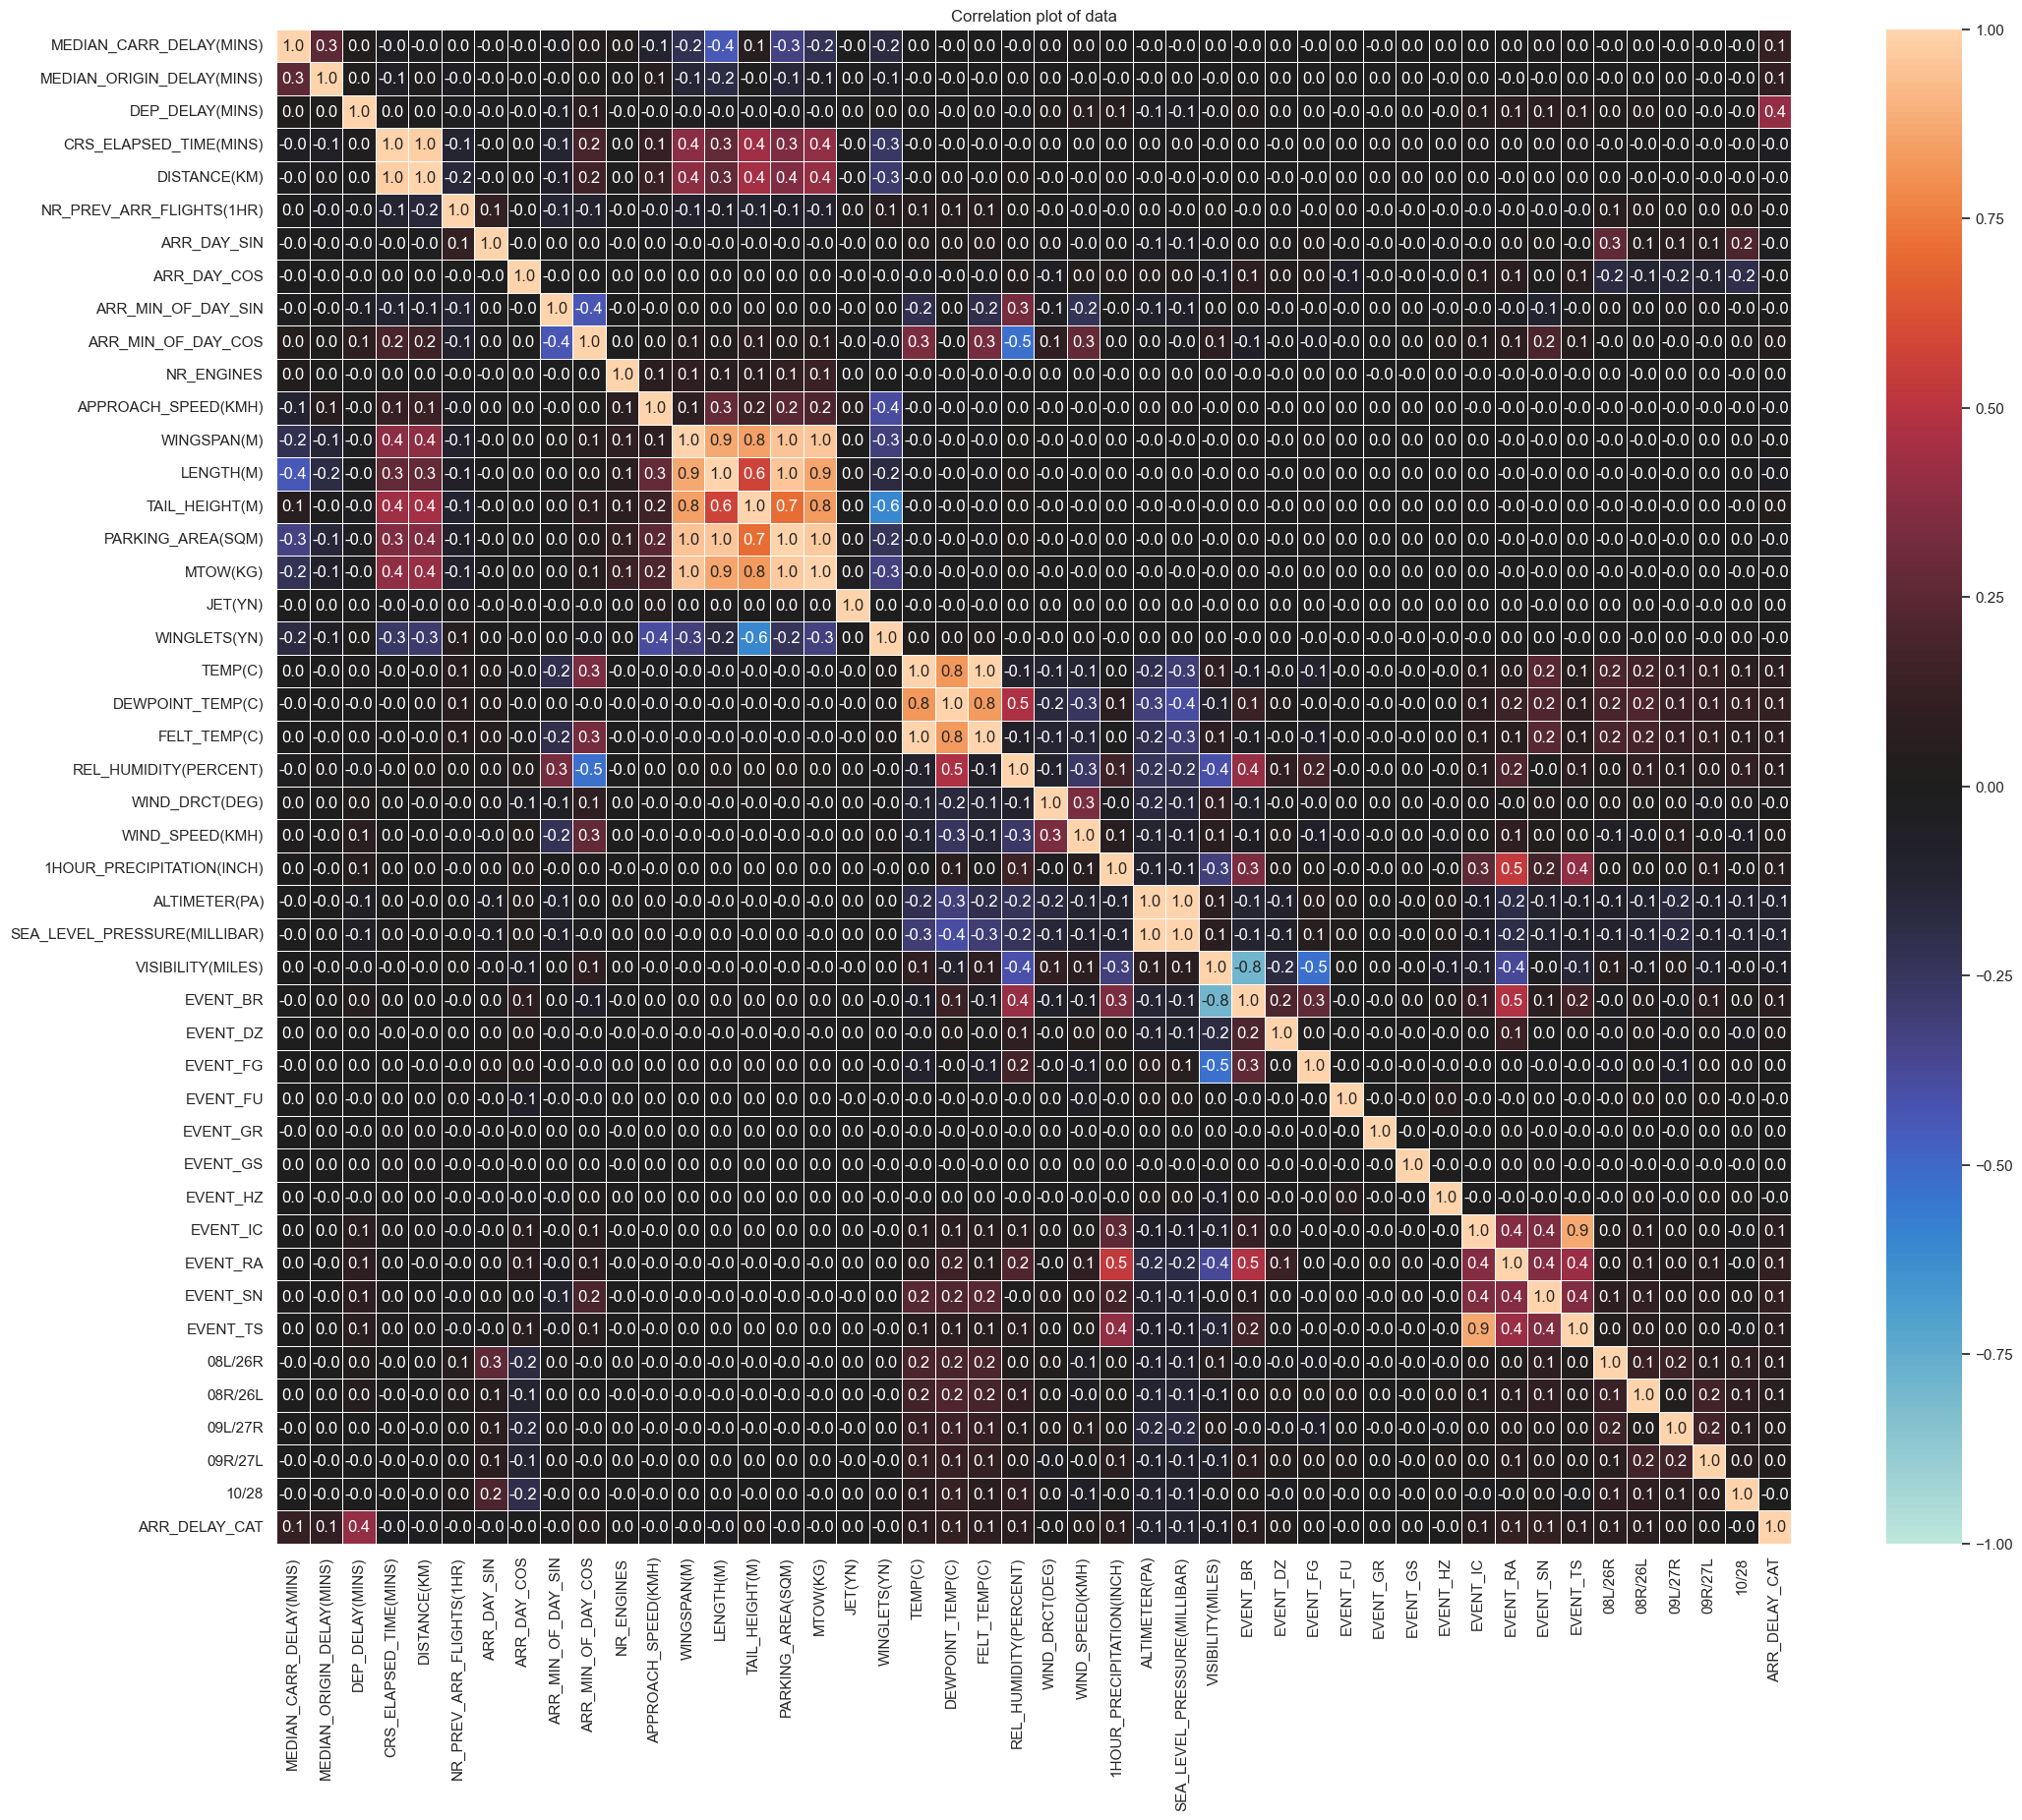

In [7]:
fig, ax = plt.subplots(figsize=(25,20))
ax.set_title("Correlation plot of data")
g = sns.heatmap(pd.DataFrame(np.hstack((X_train,pd.DataFrame(y_train))), columns=list(X_train.columns) + list(["ARR_DELAY_CAT"])).corr(), center = 0, square=True, linewidths=.5, cbar=True, vmin=-1, vmax=1, annot=True, ax = ax, fmt=".1f")

In [8]:
# Dropped columns due to low variance
low_var_labels = list(var[var < 0.01].index)
low_var_labels

['EVENT_TS',
 'EVENT_FU',
 'APPROACH_SPEED(KMH)',
 'EVENT_DZ',
 'EVENT_HZ',
 '1HOUR_PRECIPITATION(INCH)',
 'DEP_DELAY(MINS)',
 'NR_ENGINES',
 'JET(YN)',
 'EVENT_GR',
 'EVENT_GS']

In [9]:
# Dropped columns due to high correlation
high_corr_labels = ["DISTANCE(KM)", "WINGSPAN(M)", "LENGTH(M)", "TAIL_HEIGHT(M)","FELT_TEMP(C)", "PARKING_AREA(SQM)"] 

# Dropping columns previously unavailable
unav_labels = ["MEDIAN_CARR_DELAY(MINS)", "MEDIAN_ORIGIN_DELAY(MINS)", "ALTIMETER(PA)"]

labels_to_drop = low_var_labels + high_corr_labels + unav_labels
labels_to_drop

['EVENT_TS',
 'EVENT_FU',
 'APPROACH_SPEED(KMH)',
 'EVENT_DZ',
 'EVENT_HZ',
 '1HOUR_PRECIPITATION(INCH)',
 'DEP_DELAY(MINS)',
 'NR_ENGINES',
 'JET(YN)',
 'EVENT_GR',
 'EVENT_GS',
 'DISTANCE(KM)',
 'WINGSPAN(M)',
 'LENGTH(M)',
 'TAIL_HEIGHT(M)',
 'FELT_TEMP(C)',
 'PARKING_AREA(SQM)',
 'MEDIAN_CARR_DELAY(MINS)',
 'MEDIAN_ORIGIN_DELAY(MINS)',
 'ALTIMETER(PA)']

Do not remove DEP_DELAY(MINS) since its such a highly correlating variable with target. Obviously. 

In [10]:
labels_to_drop.remove("DEP_DELAY(MINS)")
labels_to_drop

['EVENT_TS',
 'EVENT_FU',
 'APPROACH_SPEED(KMH)',
 'EVENT_DZ',
 'EVENT_HZ',
 '1HOUR_PRECIPITATION(INCH)',
 'NR_ENGINES',
 'JET(YN)',
 'EVENT_GR',
 'EVENT_GS',
 'DISTANCE(KM)',
 'WINGSPAN(M)',
 'LENGTH(M)',
 'TAIL_HEIGHT(M)',
 'FELT_TEMP(C)',
 'PARKING_AREA(SQM)',
 'MEDIAN_CARR_DELAY(MINS)',
 'MEDIAN_ORIGIN_DELAY(MINS)',
 'ALTIMETER(PA)']

In [11]:
X_train = X_train.drop(columns=labels_to_drop, axis="columns")
X_test = X_test.drop(columns=labels_to_drop, axis="columns")
X_train

,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_BR,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,107,89,74,-0.433884,-0.900969,-0.985556,0.169350,72574.7200,1,6.722222,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-3,106,83,0.433884,-0.900969,0.496217,-0.868199,72574.7200,1,22.222222,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,64,98,53,-0.781831,0.623490,-0.548293,-0.836286,72574.7200,1,22.777778,...,2,0,0,3,0,0.0,3.0,0.0,0.0,3.0
7404998,-2,121,88,-0.433884,-0.900969,-0.719340,0.694658,79015.7264,0,27.777778,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,15,132,74,0.433884,-0.900969,-0.845728,0.533615,53523.8560,0,31.722222,...,0,0,0,0,2,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,95,-0.781831,0.623490,0.678801,-0.734323,40369.6880,1,3.888889,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-8,142,74,0.000000,1.000000,-0.649448,-0.760406,53523.8560,0,15.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-4,122,58,0.433884,-0.900969,-0.999914,-0.013090,122469.8400,0,21.722222,...,0,0,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,180,92,62,-0.781831,0.623490,-0.608761,0.793353,21522.9404,1,28.277778,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.14720559, 0.09072165, 0.61666667, ..., 1.        , 0.        ,
        1.        ],
       [0.09231537, 0.1257732 , 0.69166667, ..., 0.        , 1.        ,
        1.        ],
       [0.1257485 , 0.10927835, 0.44166667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.09181637, 0.15876289, 0.48333333, ..., 1.        , 0.        ,
        0.        ],
       [0.18363273, 0.09690722, 0.51666667, ..., 0.33333333, 1.        ,
        0.33333333],
       [0.09181637, 0.09072165, 0.43333333, ..., 0.66666667, 1.        ,
        0.66666667]])

In [13]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_train table: ")
X_train

X_train shape:  (263204, 26)
y_train shape:  (263204,)
X_test shape:  (65801, 26)
y_test shape:  (65801,)
X_train table: 


,DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,MTOW(KG),WINGLETS(YN),TEMP(C),...,EVENT_BR,EVENT_FG,EVENT_IC,EVENT_RA,EVENT_SN,08L/26R,08R/26L,09L/27R,09R/27L,10/28
5998106,107,89,74,-0.433884,-0.900969,-0.985556,0.169350,72574.7200,1,6.722222,...,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0
9744846,-3,106,83,0.433884,-0.900969,0.496217,-0.868199,72574.7200,1,22.222222,...,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0
8656393,64,98,53,-0.781831,0.623490,-0.548293,-0.836286,72574.7200,1,22.777778,...,2,0,0,3,0,0.0,3.0,0.0,0.0,3.0
7404998,-2,121,88,-0.433884,-0.900969,-0.719340,0.694658,79015.7264,0,27.777778,...,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0
8855927,15,132,74,0.433884,-0.900969,-0.845728,0.533615,53523.8560,0,31.722222,...,0,0,0,0,2,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-3,126,95,-0.781831,0.623490,0.678801,-0.734323,40369.6880,1,3.888889,...,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0
7551519,-8,142,74,0.000000,1.000000,-0.649448,-0.760406,53523.8560,0,15.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
7375452,-4,122,58,0.433884,-0.900969,-0.999914,-0.013090,122469.8400,0,21.722222,...,0,0,2,2,2,0.0,0.0,3.0,0.0,0.0
7757994,180,92,62,-0.781831,0.623490,-0.608761,0.793353,21522.9404,1,28.277778,...,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0


In [14]:
time, time_string = print_time(time_format="%Y_%m_%d-%H%M")

filepath = os.path.join(OUTPUT_FOLDER, "B_NEW")

if not os.path.exists(filepath):
    os.makedirs(filepath)

save_processed_data_to_folder(filepath, X_train, y_train, X_test, y_test)

joblib.dump(scaler, os.path.join(filepath , "scaler.sav"))

['C:\\Users\\chrig\\PycharmProjects\\PerturbationThesis\\data/preprocessing/processed_files\\B_NEW\\scaler.sav']